# **调用API快速搭建分类网络**

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import decode_predictions
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# 加载mobilenetV2代码，如果希望使用其他的模型，在这里进行替换就可以
pretrained_model = tf.keras.applications.MobileNetV2(include_top=True,weights='imagenet')
pretrained_model.trainable = False

def get_imagenet_lable(img):
  image = cv2.imread(img) # 使用 OpenCV 读取图片
  resized = cv2.resize(image,(224,224)) # 对输入图片进行resize
  resized = np.expand_dims(resized, 0) # 对单张图片来说扩充一维 满足输入要求
  resized = preprocess_input(resized) # 预处理到 -1到1之间
  output = pretrained_model.predict(resized[:,:,:,[2,1,0]]) # 将图片的BGR转为RGB
  preds = decode_predictions(output, top=5)
  
  return preds[0][0],preds[0][1],preds[0][2],image[:,:,[2,1,0]],resized

14548992/14536120 [==============================] - 0s 0us/step


In [3]:
# 进行结果展示的函数
def display_images(img):
  label,predict,prob,image,resized = get_imagenet_lable(img)
  print(label)
  print(predict)
  print(prob)
  plt.figure()
  plt.imshow(image)
  # plt.title('{} \n{} {:.2f}%prob'.formate(info,label,prob*100))
  plt.show()
  return label,predict,prob,image,resized

49152/35363 [=========================================] - 0s 0us/step
('n03796401', 'moving_van', 0.30703816)
('n03770679', 'minivan', 0.18564183)
('n03769881', 'minibus', 0.18149975)


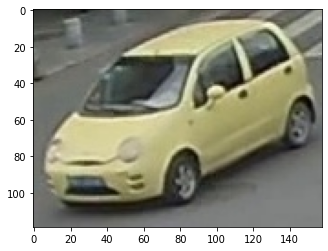

In [4]:
label,predict,prob,image,resized = display_images('0002_c004.jpg')

# **mixup数据增强测试**

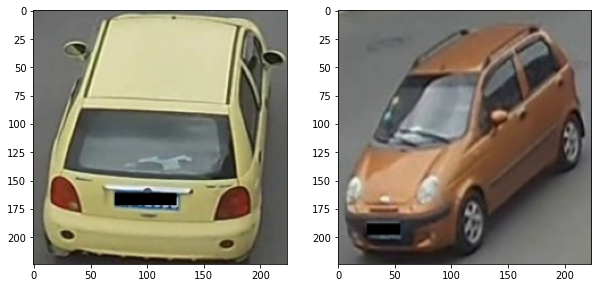

In [6]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.stats import beta
import cv2

# 导入需要mix的图片
im1 = np.array(Image.open("0002_c003.jpg")) 
im2 = np.array(Image.open("0005_c004.jpg"))

im1 = cv2.resize(im1,(224,224))
im2 = cv2.resize(im2,(224,224))

# imshow图片
plt.figure(num=1, figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(im1)
plt.subplot(1,2,2)
plt.imshow(im2)
plt.show()

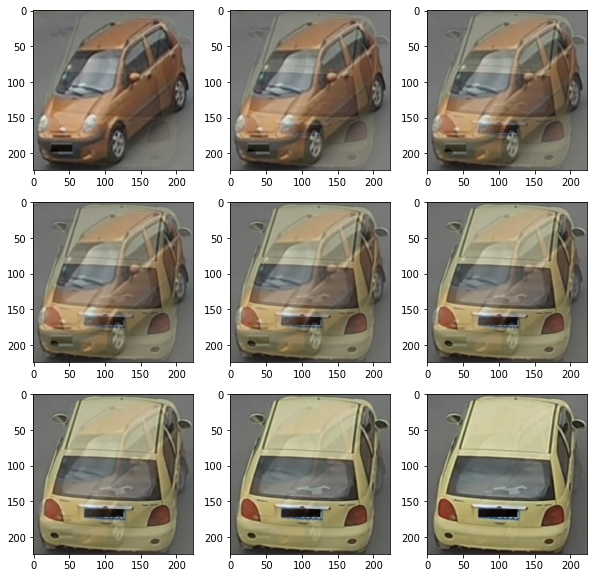

In [7]:
plt.figure(num=2, figsize=(10,10))

for i in range(1,10):
    lam= i*0.1
    im_mixup = (im1*lam+im2*(1-lam)).astype(np.uint8)
    cv2.imwrite(f'./mix_lam_{i}.jpg', im_mixup[:,:,[2,1,0]])
    # print(im_mixup)
    plt.subplot(3,3,i)
    plt.imshow(im_mixup)
plt.show()

('n03769881', 'minibus', 0.17241699)
('n03770679', 'minivan', 0.12736367)
('n03127747', 'crash_helmet', 0.08473875)


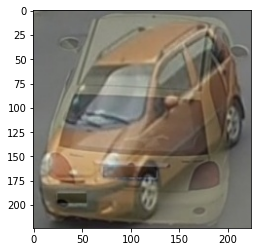

In [11]:
label,predict,prob,image,resized = display_images('mix_lam_3.jpg')  # 测试生成的mixup图片